**HBM538E Mathematical Methods in Data Analysis and Machine Learning**

**Assignment 4**

Burak Berkan Bedir
514241013

**Problem 1: The function**

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

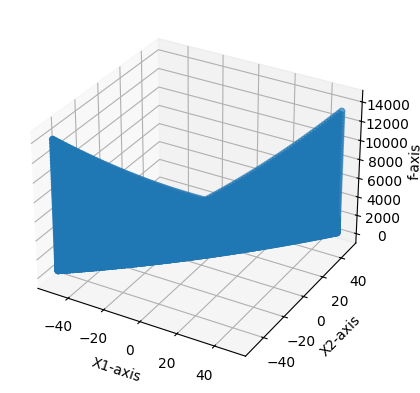

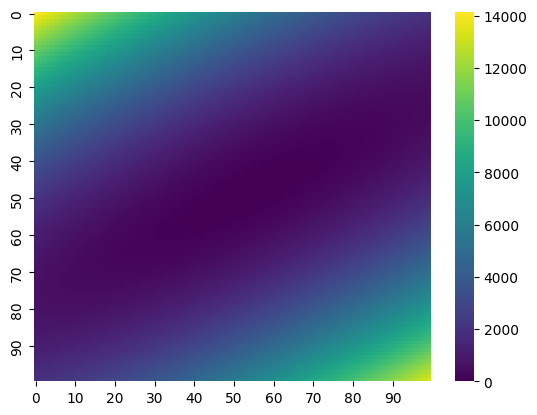

In [166]:
#f function depends on x(Nx1) vector 
def f(x,N):
    sum1=0
    for i in range(N):
        for j in range(N):
            sum1+=x[i]*x[j]/(i+j+1)
    sum2=0
    for i in range(N):
        sum2+=(i+1)*x[i]
    return 2.4*sum1-sum2+1.47

x1=np.arange(-50,50,1)
x2=x1
y=np.array([])
for i in range(x1.shape[0]):
    y=np.append(y,f([x1[i],x2],2))
y=y.reshape(x1.shape[0],x1.shape[0])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,y)
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('f-axis')
plt.show()

ax = sns.heatmap(y, cmap='viridis', xticklabels=10, yticklabels=10)
plt.show()


**Problem 2: Optimization problem**

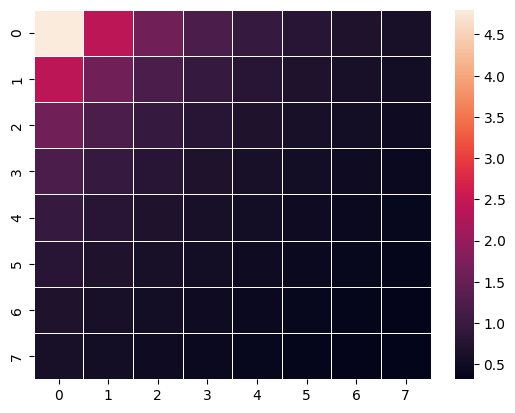

Exact minimum value of f(x) is -9245.196712665465 in N=8 dimensions, x=inversed(S)*b, f_min=f(x)


In [167]:
def f(x,N):
    sum1=0
    for i in range(N):
        for j in range(N):
            sum1+=x[i]*x[j]/(i+j+1)
    sum2=0
    for i in range(N):
        sum2+=(i+1)*x[i]
    return 2.4*sum1-sum2+1.47

def f2(x,N):
    S = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            S[i, j] = 2* 2.4 / (i + j + 1)
    b = np.arange(1, N+1)
    c = 1.47
    return 1/2 * np.matmul(x.T, np.matmul(S, x)) - np.matmul(b.T, x) + c , S

x=np.ones(8)*1.5
N=x.shape[0]
f22,Smatrix=f2(x,N)
ax = sns.heatmap(Smatrix, linewidth=0.5)
plt.show()
x=np.matmul(np.linalg.inv(Smatrix),np.arange(1,N+1))
f22=f2(x,N)
print(f'Exact minimum value of f(x) is {f22[0]} in N={N} dimensions, x=inversed(S)*b, f_min=f(x)')

**Problem 3: Properties of S**

In [168]:
Lamdas=np.linalg.eigvals(Smatrix)
if min(Lamdas)>0:
    print('Eigenvalues are positive and S matrix is positive definite.')
else:
    print('S is not positive definite')

Eigenvalues are positive and S matrix is positive definite.


**Problem 4: Implementation of the Gradient Descent**

$f(x) = 1/2 x^T S x − b^T x + c$

$\nabla f(x)=S x - b$

In [169]:
def grad_f(x, N):
    S = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            S[i, j] = 2* 2.4 / (i + j + 1)
    b = np.arange(1, N+1)
    return np.matmul(S,x)-b


4.1 In-exact line search with s0 = 0.1, 0.01 and 0.001, respectively

In [170]:
def grad_descent_inexact(x, N, s0=0.001, tol=1e-6, max_iter=10000):
    for iteration in range(max_iter):
        grad = grad_f(x, N)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        s = s0
        while f(x - s * grad, N) > f(x, N) - 0.5 * s * norm_grad**2: 
            s *= 0.5
        x = x - s * grad
    return x, f(x, N), iteration

x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]

s=[0.1,0.01,0.001]
for i in s:
    print(f'learning rate: {i}')
    x, f_min, iteration = grad_descent_inexact(x, N, s0=i)
    print(f'Optimal solution: {x}')
    print(f'Optimal value: {f_min}')
    print(f'Number of iterations: {iteration}')
    print('')

Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
learning rate: 0.1
Optimal solution: [  -7.45651177   10.19216901  176.34380323  -98.6029336  -289.05235868
 -247.66795535   29.46216113  506.5266206 ]
Optimal value: -884.4452544674842
Number of iterations: 9999

learning rate: 0.01
Optimal solution: [  -6.51307728   -1.5767481   201.39482709  -93.45068368 -306.78748685
 -270.77372669   22.62408655  535.94671774]
Optimal value: -909.9886750434057
Number of iterations: 9999

learning rate: 0.001
Optimal solution: [  -6.41975542   -2.73780088  203.85833565  -92.93131055 -308.53058272
 -273.05864444   21.94050494  538.85303151]
Optimal value: -912.4755311846683
Number of iterations: 9999



4.2 Backtracking with s0 = 0.5.

In [171]:
def grad_descent_backtracking(x, N, s=0.5, alpha=0.5, beta=0.5, tol=1e-6, max_iter=10000):
    for iteration in range(max_iter):
        grad = grad_f(x, N)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        while f(x - s * grad, N) > f(x, N) - s * alpha * norm_grad**2:
            s *= beta
        x = x - s * grad
    return x, f(x, N), iteration

x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]
x, f_min, iteration = grad_descent_backtracking(x, N)
print(f'Optimal solution: {x}')
print(f'Optimal value: {f_min}')
print(f'Number of iterations: {iteration}')


Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
Optimal solution: [  -5.13554533  -18.67670692  237.55990549  -85.60022933 -332.37763991
 -304.56977625   12.38402509  578.89429332]
Optimal value: -946.059535516286
Number of iterations: 9999


4.3 Momentum with the optimal parameter.

In [172]:
def grad_descent_moment(x, N, s0=0.01, beta=0.9, tol=1e-6, max_iter=10000):
    v = np.zeros_like(x)
    for iteration in range(max_iter):
        grad = grad_f(x, N)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        v = beta * v - s0 * grad
        x = x + v
    return x, f(x, N), iteration

x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]
x, f_min, iteration = grad_descent_moment(x, N)
print(f'Optimal solution: {x}')
print(f'Optimal value: {f_min}')
print(f'Number of iterations: {iteration}')


Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
Optimal solution: [  -7.46377585   10.27552419  176.18256792  -98.65792316 -288.94204185
 -247.50059369   29.52446675  506.32037636]
Optimal value: -884.2668704769468
Number of iterations: 9999


4.4 Nesterov method with the optimal parameters.

In [173]:
def grad_descent_nesterov(x, N, s0=0.01, beta=0.9, tol=1e-6, max_iter=10000):
    v = np.zeros_like(x)
    for iteration in range(max_iter):
        grad = grad_f(x+beta*v, N)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        s = s0
        while f(x - s * grad, N) > f(x, N) - 0.5 * s * norm_grad**2: 
            s *= 0.5
        v = beta * v - s * grad
        x = x + v
    return x, f(x, N), iteration
x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]
x, f_min, iteration = grad_descent_nesterov(x, N)
print(f'Optimal solution: {x}')
print(f'Optimal value: {f_min}')
print(f'Number of iterations: {iteration}')

Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
Optimal solution: [  -7.46390777   10.27791842  176.17579148  -98.65702927 -288.93685659
 -247.49631778   29.52439405  506.31422414]
Optimal value: -884.2611478679063
Number of iterations: 9999


4.5 ADAM method with the default parameters

In [174]:
def grad_descent_ADAM(x, N, s0=0.1, beta1=0.9,beta2=0.999, tol=1e-6, max_iter=10000):
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for iteration in range(max_iter):
        grad = grad_f(x, N)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        m = beta1 * m + (1-beta1) * grad
        v = beta2 * v + (1-beta2) * grad**2
        m_hat = m / (1 - beta1**(iteration+1))
        v_hat = v / (1 - beta2**(iteration+1))
        x = x - s0 * m_hat / (np.sqrt(v_hat) + 1e-8)
    return x, f(x, N), iteration
x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]
x, f_min, iteration = grad_descent_ADAM(x, N)
print(f'Optimal solution: {x}')
print(f'Optimal value: {f_min}')
print(f'Number of iterations: {iteration}')

Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
Optimal solution: [  11.86417457 -222.02004046  643.39509783  120.23587377 -857.70755431
 -713.10947639  335.79249838  778.0213894 ]
Optimal value: -1210.8985463355555
Number of iterations: 9999


**Problem 5: The Stochastic Gradient Descent**

In [175]:
def stocatestic_grad_descent(x, N, s0=0.1,batch_size=2, tol=1e-6, max_iter=10000):
    indices = np.arange(N)
    for iteration in range(max_iter):
        grad = np.zeros(N)
        np.random.shuffle(indices)
        for i in range(0, N, batch_size):
            batch_indices = indices[i:i + batch_size]
            grad_batch = np.zeros(N)
            for j in batch_indices:
                grad_batch[j] = grad_f(x, N)[j]
            grad += grad_batch / batch_size
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        x = x - s0 * grad
    return x, f(x, N), iteration
x = np.ones(8)*1.5
print(f'Initial solution: {x}')
N = x.shape[0]
x, f_min, iteration = stocatestic_grad_descent(x, N)
print(f'Optimal solution: {x}')
print(f'Optimal value: {f_min}')
print(f'Number of iterations: {iteration}')

Initial solution: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
Optimal solution: [ -11.8455614    69.63966177   41.53307086 -119.86387629 -189.63948148
 -124.6759652    61.92479355  345.7232025 ]
Optimal value: -735.9001440322463
Number of iterations: 9999


**Problem 6: Compare and justify your results**

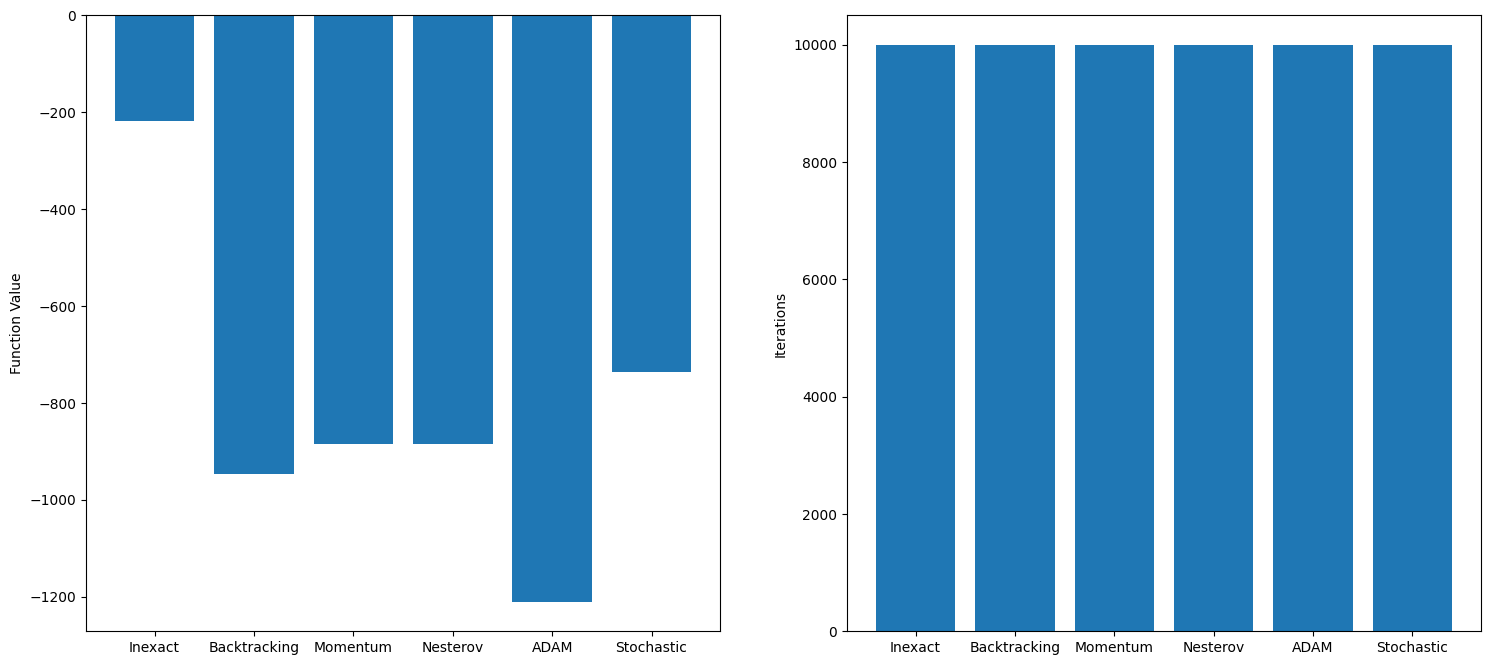

In [ ]:
#plot iteration number vs function value for each method in problem 4 and problem 5.
x0 = np.ones(8)*1.5
N = x0.shape[0]
methods = ['Inexact', 'Backtracking', 'Momentum', 'Nesterov', 'ADAM', 'Stochastic']

function_values = [grad_descent_inexact(x0, N)[1], 
                   grad_descent_backtracking(x0, N)[1], 
                   grad_descent_moment(x0, N)[1], 
                   grad_descent_nesterov(x0, N)[1], 
                   grad_descent_ADAM(x0, N)[1],
                   stocatestic_grad_descent(x0, N)[1]]

iterations = [grad_descent_inexact(x0, N)[2], 
              grad_descent_backtracking(x0, N)[2], 
              grad_descent_moment(x0, N)[2], 
              grad_descent_nesterov(x0, N)[2], 
              grad_descent_ADAM(x0, N)[2],
              stocatestic_grad_descent(x0, N)[2]]

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.bar(methods, function_values)
plt.ylabel('Function Value')
plt.subplot(1, 2, 2)
plt.bar(methods, iterations)
plt.ylabel('Iterations')
plt.show()



Conclusion: The minimum value of the f function is -9245 calculated with $f(S^{-1}b),N=8$. Adam algorithm is nearest value with the minimum value in 9999 iteration.